# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        
        positions[0] = self.pos
        #print ("1: ",positions)
        for j in range(1,n+1):
            positions[j] = positions[j-1]+self.pickStep()
            
        return positions



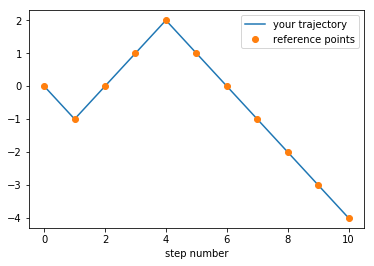

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

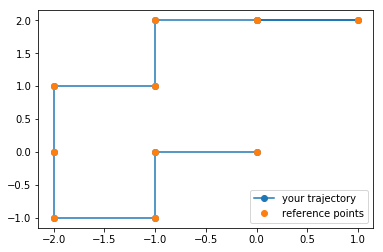

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

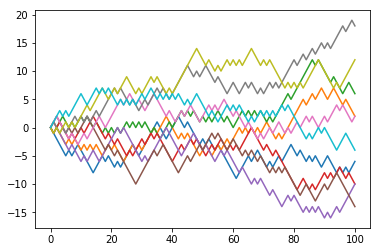

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


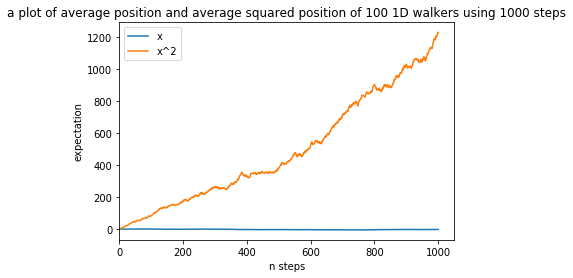

In [6]:
nsteps = 1000
ndim = 1
nwalkers = 100

#generating an array that contains the final position of all 100 of the walkers after 1000 steps

Data1 = numpy.array([])
Data2 = numpy.array([])
w = walker(numpy.zeros(1))

a = w.doSteps(nsteps)
Data1 = a
d = numpy.power(a, 2)
Data2 = d
#print (d.shape)
for i in range(nwalkers-1):
    #print (i)
    a = w.doSteps(nsteps)
    d = numpy.power(a, 2)
    Data1 = numpy.hstack([Data1,a])
    Data2 = numpy.hstack([Data2,d])
    
#create expectation data

Exp1 = Data1.mean(axis=1)
Exp2 = Data2.mean(axis=1)


plt.plot(range(nsteps+1),Exp1,label = "x")
plt.plot(range(nsteps+1),Exp2, label = "x^2")
plt.xlabel("n steps")
plt.ylabel("expectation")
plt.title("a plot of average position and average squared position of 100 1D walkers using 1000 steps")
plt.xlim(0)
plt.ylim()
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


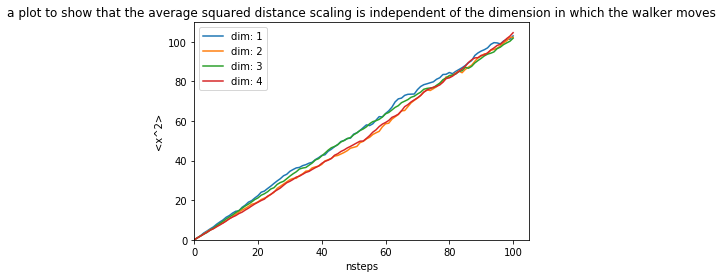

In [7]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

#I need to make a special function that 
def SpecF(array):
    darray = []
    for  i in range(len(array)):
        l=0
        for j in range(len(array[0])):
            l += array[i,j]**2
        darray.append(l)
    return(darray)

            


for dim in dimensions: 
    w = walker(numpy.zeros(dim), dim)
    Data = numpy.array([])
    
    a = w.doSteps(nsteps)
    
    Data = SpecF(a)
    

    for i in range(nwalkers-1):
   
        a = w.doSteps(nsteps)
    
        d = SpecF(a)
        
    
        Data = numpy.vstack([Data,d])

    Exp = Data.mean(axis=0)
    #print(Exp,Data)
    plt.plot(range(nsteps+1),Exp, label = "dim: "+ str(dim))

plt.title("a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves")
plt.ylabel("<x^2>")
plt.xlabel("nsteps")
plt.xlim(0)
plt.ylim(0)
plt.legend()

             

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


In [9]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    
    w = walker(numpy.zeros(2),rand_pos[0], ndim=2, step_size=0.05)
    a=w.doSteps(i)
    b=a[-1]
    for j in range(nwalkers-1):
        w = walker(numpy.zeros(2),rand_pos[j+1], ndim, step_size=0.05)
        a=w.doSteps(i)
        b=numpy.hstack([b,a[-1]])
    
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(b[:,0], b[:,1], alpha=0.1)
    

TypeError: __init__() got multiple values for argument 'ndim'

<Figure size 1296x432 with 0 Axes>

In [120]:
#positions=numpy.ndarray((n+1,self.ndim),dtype='f')
r=numpy.ndarray((4,4),dtype='f')
r[2,1] = 69

print(r)

[[-1.5881868e-23  3.0572264e+00  4.1723251e-08  2.8781250e+00]
 [ 0.0000000e+00  3.8653564e+00  4.1723251e-08  2.8781250e+00]
 [-1.5881868e-23  6.9000000e+01  6.9000000e+01  3.7219529e+00]
 [ 0.0000000e+00  3.8653564e+00 -2.3021536e+20  3.7219529e+00]]


In [124]:
def SpecF(array):
    darray = []
    for  i in range(len(array)):
        l=0
        for j in range(len(array[0])):
            l += array[i,j]**2
        darray.append(l)
    return(darray)

print(SpecF(r))

[17.630236620921664, 23.2245836904645, 9535.852933502903, 5.299911087289112e+40]
